<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:40px;color:#F94C10;">US Accidents Data
</li>
</ul>



<p style="font-size:15px;">
This is an accident dataset <span style="color: #C70039; font-weight: 800;">(2016 - March 2023)</span>, using multiple APIs that provide streaming traffic incident (or event) data. The dataset has around <span style="color: #C70039; font-weight: 800;">7.7 million</span> rows and captures different accident specificities:  
</p>

<table border="1">
    <tr>
        <th> Feature Group</th>
        <th>Columns</th>
    </tr>
    <tr>
        <td>Time Features :<br> Time of the accident in local time zone.</td>
        <td>Start_Time, End_Time</td>
    </tr>
    <tr>
        <td>Time of Day Features :<br> Boolean features showing period of day based on sunrise/sunset.</td>
        <td>Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight</td>
    </tr>
    <tr>
        <td>Geographic Features :<br> Geographic Coordinates of the accident.</td>
        <td>Start_Lat, Start_Lng, End_Lat, End_Lng</td>
    </tr>
    <tr>
        <td>Location Features :<br> Description of the location of the accident.</td>
        <td>Street Number, City, County, State, Zipcode, Country, Timezone, Airport_Code</td>
    </tr>
    <tr>
        <td>Weather Features :<br> Description of the weather at the accident moment.</td>
        <td>Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition</td>
    </tr>
    <tr>
        <td>Accident Features :<br> Primary Key + Other Features of Accident.</td>
        <td>ID, Source, Severity, Description, Distance(mi)</td>
    </tr>
    <tr>
        <td>Road Condition Features :<br> Boolean features of Road Condition.</td>
        <td>Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop</td>
    </tr>
</table>

<p style="font-size:15px;">
For the sake of the analysis, we're only going to look at (mainly) post-covid containment data, <span style="font-style: italic;">i.e. in 2021/2022/2023</span>.
    
Also, the structure of the analysis will be divided into <span style="color: #C70039; font-weight: 800;">a series of questions</span>, from which insights will be drawn each time.
</p>

<ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #F94C10">How will we get insights ?</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li><span style="font-weight: bold;">Descriptive Analysis :</span> Study of the distribution and variability of our dataset</li>
    <li><span style="font-weight: bold;">Visualization</span></li>
    <li><span style="font-weight: bold;">Inference Analysis :</span> Study of Samples and behavior of our data</li>
</ul>


<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: italic;font-size:15px">Let's start !</li>
    <li style="font-weight: italic;font-size:17.5px">Take a look at the libraries we'll be using</li>
</ul>

In [ ]:
import pandas as pd
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy
import statsmodels.api as sm
from matplotlib import ticker
import matplotlib.font_manager as font_manager

from shapely.geometry import Point
import geopandas as gpd

from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:30px;color:#F94C10">Descriptive Analysis</li>
</ul>

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: italic;font-size:17.5px">Data Overview</li>
</ul>

In [63]:
df = pd.read_csv("./US_Accident_2021_2022.csv")
df['Start_Time'] = pd.to_datetime(df["Start_Time"], errors="coerce")
df['End_Time'] = pd.to_datetime(df["End_Time"], errors="coerce")
df.head(4)

,Unnamed: 0,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,0,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,...,False,False,False,True,False,Night,Night,Day,Day,2022
1,1,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2022
2,2,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,...,False,False,False,True,False,Night,Night,Night,Night,2022
3,3,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,NaN,NaN,...,False,False,False,False,False,Night,Night,Day,Day,2022


In [4]:
df["Year"]=df["Start_Time"].dt.year
df["Severity"]=df["Severity"].apply(lambda x : str(x))
df["Hour"]=df["Start_Time"].dt.hour
df["Month"]=df["Start_Time"].dt.month
df["Day"]=df["Start_Time"].dt.day_name()

----

<div class="alert alert-info" role="alert" style="background-color:#F8DE22">
  <p style="font-size:20px;color:black">Descriptive analysis is a <span style="font-weight:bold;">statistical technique</span> used to summarize and describe the main characteristics of a dataset. It provides valuable insights into the <span style="font-weight:bold;">distribution and variability</span> of the data.</p>
  <ul style="list-style-type:round;font-size:18.5px;color:black">
    <li>The count feature tells us the number of non-null values in each column, giving us an idea of the data completeness.</li>
    <br>
    <li>The mean represents the average value of a numerical column, providing a measure of the central tendency.</li>
    <br>
    <li>The minimum and maximum values give us the range of the data, indicating the lowest and highest values observed.</li>
    <br>
    <li>Quartiles divide the data into four equal parts (25%, 50% (Median), 75%), helping us understand the spread and distribution of the data. </li>
    <br>
    <li>The standard deviation measures the dispersion or variability of the data points around the mean, giving us an indication of the data's consistency.</li>
  </ul>
  <p style="font-size:20px;color:black">By analyzing these features, we can gain valuable insights into the dataset and make informed decisions based on the data's characteristics. This helps both in analysis as well as in data cleaning, with the <span style="font-weight:bold;">detection of outliers</span> or to <span style="font-weight:bold;">check the validity of the data.</span></p>
    <br>
  <p style="font-size:20px;color:black;font-style:italic;"><span style="font-weight:bold;">For example:</span> one of the best-known distributions is the Normal Distribution (characterized by a bell curve), which is often "assumed" as such for data by Machine Learning models for predictions, and which is characterized by an equal mean and median:</p>
  <br>
  <img src="https://ubalt.pressbooks.pub/app/uploads/sites/11/2020/12/ch29a-redone.png">
</div>


<style>
p {
  font-size: 30px;
}
</style>

In [5]:
df.describe()

,Unnamed: 0,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Hour,Month
count,2.681239e+06,2681239,2681239,2.681239e+06,2.681239e+06,1.994972e+06,1.994972e+06,2.681239e+06,2.625583e+06,2.605330e+06,2.622068e+06,2.633218e+06,2.623121e+06,2.613221e+06,2.576743e+06,2.681239e+06,2.681239e+06,2.681239e+06
mean,1.340619e+06,2021-12-21 21:57:23.714977536,2021-12-22 09:28:27.389299456,3.589192e+01,-9.355761e+01,3.580251e+01,-9.403707e+01,7.808727e-01,6.259011e+01,6.136581e+01,6.392950e+01,2.936789e+01,9.103611e+00,7.338940e+00,5.656878e-03,2.021473e+03,1.245437e+01,6.520946e+00
min,0.000000e+00,2021-01-01 00:00:00,2021-01-01 00:40:30,2.455480e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-4.500000e+01,-6.300000e+01,1.000000e+00,1.671000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.021000e+03,0.000000e+00,1.000000e+00
25%,6.703095e+05,2021-07-03 11:04:26.500000,2021-07-03 20:02:09,3.289758e+01,-1.140666e+02,3.280127e+01,-1.172055e+02,1.200000e-02,5.000000e+01,5.000000e+01,4.700000e+01,2.919000e+01,1.000000e+01,3.000000e+00,0.000000e+00,2.021000e+03,8.000000e+00,3.000000e+00
50%,1.340619e+06,2021-12-16 15:07:00,2021-12-16 20:17:08,3.573550e+01,-8.602293e+01,3.578865e+01,-8.566609e+01,1.750000e-01,6.600000e+01,6.600000e+01,6.600000e+01,2.970000e+01,1.000000e+01,7.000000e+00,0.000000e+00,2.021000e+03,1.300000e+01,6.000000e+00
75%,2.010928e+06,2022-06-06 08:59:50.500000,2022-06-06 17:54:05,3.995451e+01,-8.020639e+01,3.991553e+01,-8.016402e+01,8.280000e-01,7.700000e+01,7.700000e+01,8.300000e+01,2.996000e+01,1.000000e+01,1.000000e+01,0.000000e+00,2.022000e+03,1.700000e+01,1.000000e+01
max,2.681238e+06,2022-12-31 23:59:03,2023-03-31 23:59:00,4.900050e+01,-6.755331e+01,4.900222e+01,-6.851089e+01,3.365700e+02,1.960000e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,2.022000e+03,2.300000e+01,1.200000e+01
std,7.740072e+05,NaN,NaN,5.212479e+00,1.726135e+01,5.355336e+00,1.765948e+01,1.884682e+00,1.939700e+01,2.156262e+01,2.285021e+01,1.094999e+00,2.479218e+00,5.490091e+00,5.490660e-02,4.992822e-01,5.515418e+00,3.576428e+00


<ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #900C3F">Insights</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>Over 75% of accident visibility is 10 miles or less. (Even at 25%, it's still 10 Miles or less, showing the concentration of the distribution towards one point).</li>
    <li>The temperature has a mean of 62.5° F, with a range of [-45 , 196]. Beyond that, with a std of 19.3, we can assume a fairly wide temperature variability for the United States.</li>
    <li>More than 75% of wind speeds are at 10 mph or less, but there are instances of extreme wind, which can seriously affect accidents.</li>
</ul>

-------

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:30px;color:#F94C10">Visualization</li>
</ul>

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:23px;font-style: italic;">When do accidents usually occur during the week? </li>
</ul>

C:\Users\xfour\AppData\Local\Temp\ipykernel_7360\2629484730.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

  plt.style.use('seaborn-dark')


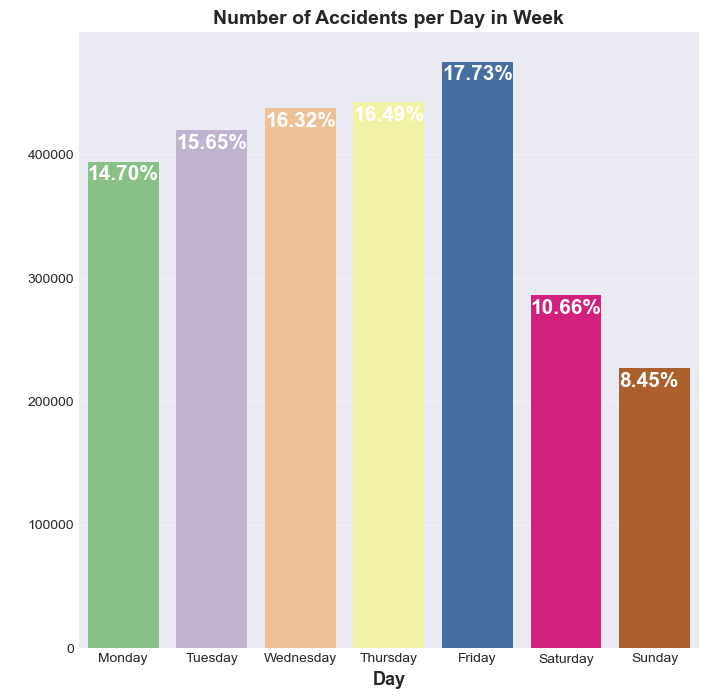

In [68]:
plt.style.use('seaborn-dark')

custom_palette = sns.color_palette("Accent", 7)

# Change the default color palette to the custom palette
sns.set_palette(custom_palette)

plt.figure(figsize=(8, 8))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=df["Day"], order=order)

# Calculate the total counts
total_counts = df["Day"].value_counts()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Day", fontsize=13, fontweight="bold")
plt.ylabel(" ")
plt.title("Number of Accidents per Day in Week", fontsize=14, fontweight="bold")

ax = plt.gca()

for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]]/total_counts.sum()) * 100
    ax.text(
        bar.get_x(),  
        bar.get_height()-15000,  
        f'{proportion:.2f}%',
        fontsize=15,
        weight='bold',
        color='white'
    )

plt.show()


In [9]:
df["Is_Weekend"] = df["Day"].isin(["Saturday", "Sunday"])

<ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #900C3F">Insights</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>There is a clear reduction in the number of accidents at weekends, with an average of -10.66% (note that this does not take into account peak times or big events, which could clearly influence these results).</li>
</ul>

In [70]:
sns.reset_defaults()


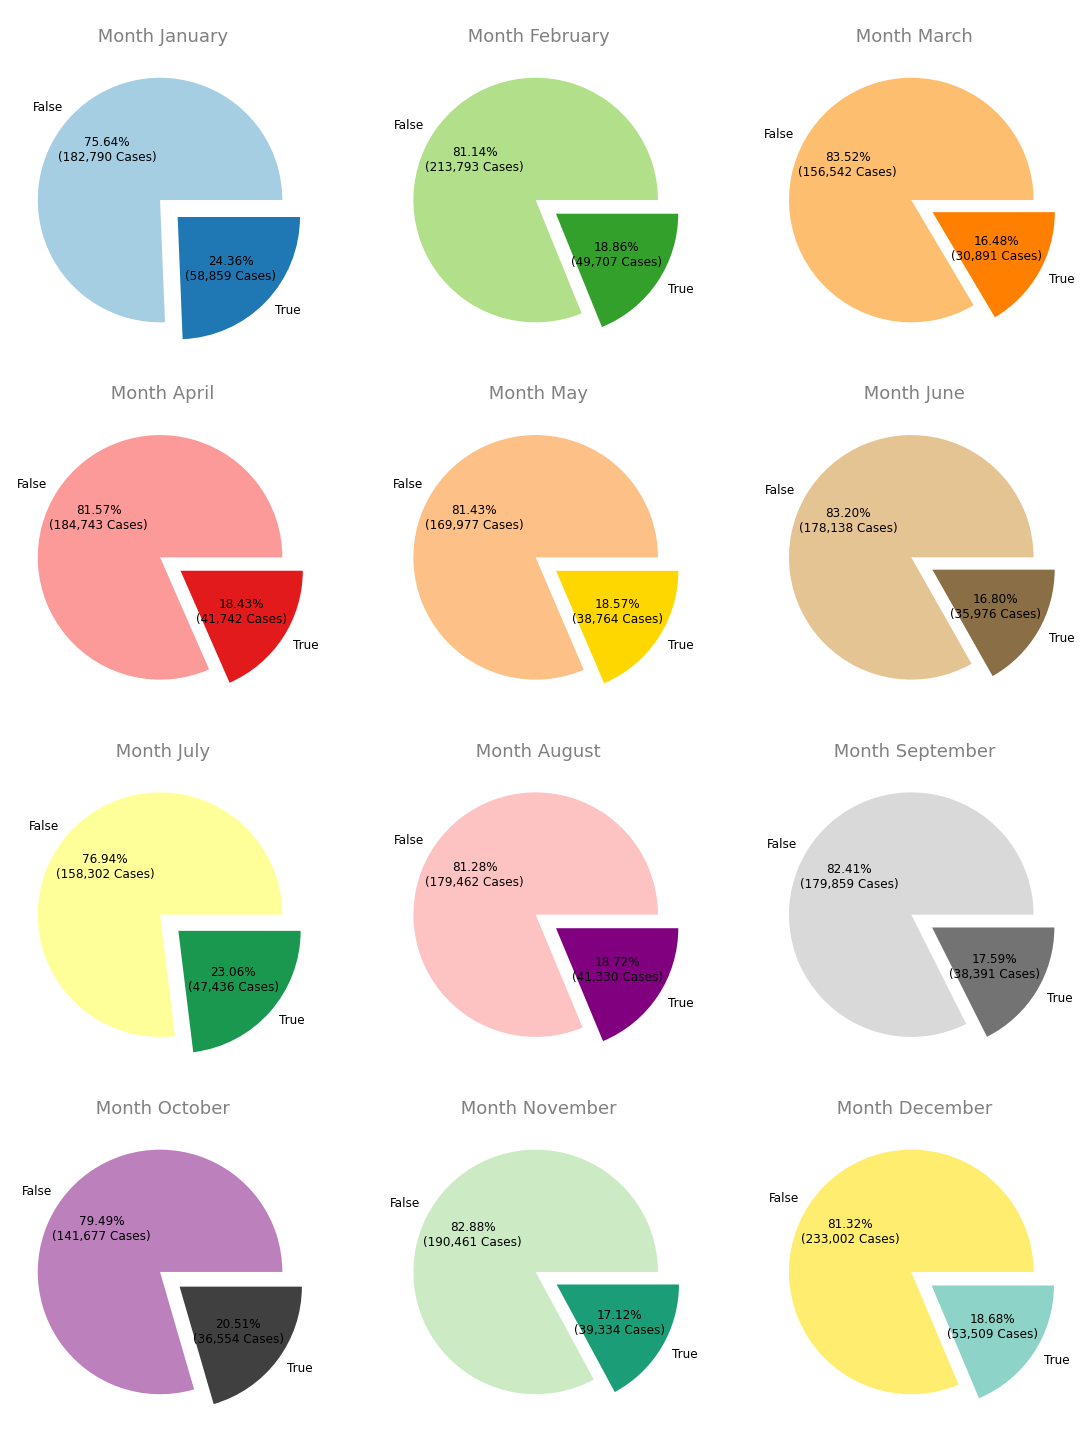

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))

month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

colors = [('#A6CEE3', '#1F78B4'), ('#B2DF8A', '#33A02C'), ('#FDBF6F', '#FF7F00'), ('#FB9A99', '#E31A1C'),
          ('#FDC086', '#FFD700'), ('#E5C494', '#8A6E45'), ('#FFFF99', '#1A9850'), ('#FDC3C3', '#800080'),
          ('#D9D9D9', '#737373'), ('#BC80BD', '#404040'), ('#CCEBC5', '#1B9E77'), ('#FFED6F', '#8DD3C7')]



count = 0

def func(pct, allvals):
    absolute = int(round(pct / 100 * np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)

for i, ax in enumerate(axes.flatten()):
    month = i + 1
    size = list(df[df["Month"] == month]["Is_Weekend"].value_counts())
    if len(size) != 2:
        size.append(0)

    labels = ['False', 'True']

    ax.pie(size, labels=labels, colors=colors[count],
           autopct=lambda pct: func(pct, size), labeldistance=1.1,
           textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\n Month {}'.format(month_map[month])

    ax.set_title(title, fontsize=18, color='grey')

    count += 1
    
plt.tight_layout()
plt.show()


<ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #900C3F">Insights</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>January has the highest proportion of weekend accidents compared with weekday accidents, at 24.36%.</li>
    <li>March has the lowest proportion of weekend accidents, at 16.48%.</li>
    <li>December has the highest number of accidents.</li>
    <li>October has the lowest number of accidents.</li>
</ul>

---------

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:23px;font-style: italic;margin:15px;">"What is the most frequent "Severity" level for accidents ?
 </li>
    <li style="font-weight: bold;font-size:23px;font-style: italic;">Which locations have the most accidents in the USA ?" 
 </li>
</ul>

In [7]:
crosstab=pd.crosstab(df["Timezone"],df["Severity"])
crosstab

Severity,1,2,3,4
Timezone,,,,
US/Central,9280,432288,69248,9208
US/Eastern,22206,1181414,103366,37984
US/Mountain,1493,129921,11566,4141
US/Pacific,4992,614656,41774,5465


<ul style="list-style-type:none; text-align:center;">
    <li style="font-size:23px;font-style: italic;margin:15px;">We can see the Timezones with the highest number of accidents, but let's go and do some visualizations for more precision!
 </li>
</ul>

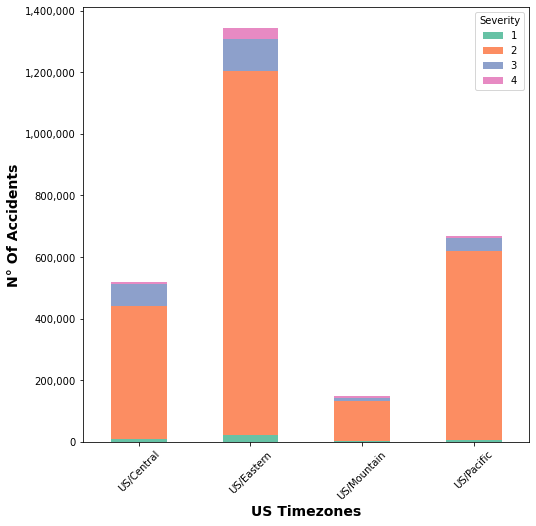

In [8]:
sns.set_palette("Set2")


crosstab.plot(kind="bar",stacked=True,
              figsize=(8,8),
             rot=45,
             fontsize=10
             )
label_font_bold = font_manager.FontProperties(weight='bold')
plt.xlabel("US Timezones",fontsize=14,fontproperties=label_font_bold)
plt.ylabel("N° Of Accidents",fontsize=14,fontproperties=label_font_bold)

formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [12]:
sns.set_palette(sns.color_palette())


<ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #900C3F">Insights</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>A large proportion of accidents are classified at severity level 2</li>
    <li>Level "1" and "4" accidents seem to be the rarest</li>
    <li>The East Coast has the most accidents.</li>
    <li>The mountainous areas have the fewest.</li>
</ul>

-------

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:23px;font-style: italic;margin:15px;">"Okay, but what about states specifically? Something more specific!"
 </li>
</ul>

<ul style="list-style-type:none; text-align:center;">
    <li style="font-size:23px;font-style: italic;margin:15px;">To do this, we're not just going to make a count plot, we're going to study the ranking of states and, more importantly, their evolution over the years!
 </li>
    <li style="font-size:23px;font-style: italic;margin:15px;">We'll use the original dataset from 2016 to mid-2023.
 </li>
</ul>

To do this, we're not just going to make a count plot, we're going to study the ranking of states and, more importantly, their evolution over the years! In this case, we'll use the original dataset from 2016 to mid-2023.

In [3]:
df = pd.read_csv("./US_Accidents_March23.csv")
df['Start_Time'] = pd.to_datetime(df["Start_Time"], errors="coerce")
df['End_Time'] = pd.to_datetime(df["End_Time"], errors="coerce")
df["Year"]=df["Start_Time"].dt.year
df["Hour"]=df["Start_Time"].dt.hour
df["Month"]=df["Start_Time"].dt.month
df.tail(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Hour,Month
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,...,False,False,False,Day,Day,Day,Day,2019.0,19.0,8.0
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,...,False,False,False,Day,Day,Day,Day,2019.0,18.0,8.0


In [4]:
df["State"].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [166]:
ranking_result=[]
list_no_2023 = list(filter(lambda item: item != 2023,element["Year"]))

for i in df["State"].unique():
    rank_year=[]
    for j in list_no_2023:
        rank=df.loc[(df["Year"]==j)]["State"].value_counts().rank()
        try:
            rank_year.append(len(df["State"].unique())-rank[i]+1)
        except:
            rank_year.append(np.nan)
    proportion = len(df.loc[(df["Year"]==j) & (df["State"]==i)]) / len(df.loc[(df["Year"]==j)])
    ranking_result.append(
            {
                "Name" : [str(i) for j in range(1,8)],
                'Year' : list_no_2023,
                'Rank' : rank_year,
                "Proportion" : proportion*100
            }
    )

In [167]:
ranking_result

[{'Name': ['OH', 'OH', 'OH', 'OH', 'OH', 'OH', 'OH'],
  'Year': [2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0],
  'Rank': [9.0, 14.0, 19.0, 22.0, 19.0, 24.0, 18.0],
  'Proportion': 1.6029243241283537},
 {'Name': ['WV', 'WV', 'WV', 'WV', 'WV', 'WV', 'WV'],
  'Year': [2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0],
  'Rank': [36.0, 41.0, 42.0, 44.0, 44.0, 38.0, 34.0],
  'Proportion': 0.2845194616040592},
 {'Name': ['CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA'],
  'Year': [2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0],
  'Rank': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  'Proportion': 20.98626582787282},
 {'Name': ['FL', 'FL', 'FL', 'FL', 'FL', 'FL', 'FL'],
  'Year': [2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0],
  'Rank': [3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0],
  'Proportion': 14.667411724093359},
 {'Name': ['GA', 'GA', 'GA', 'GA', 'GA', 'GA', 'GA'],
  'Year': [2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0],
  'Rank': [8.0, 10.0, 8.0, 12.0, 16.0, 19.

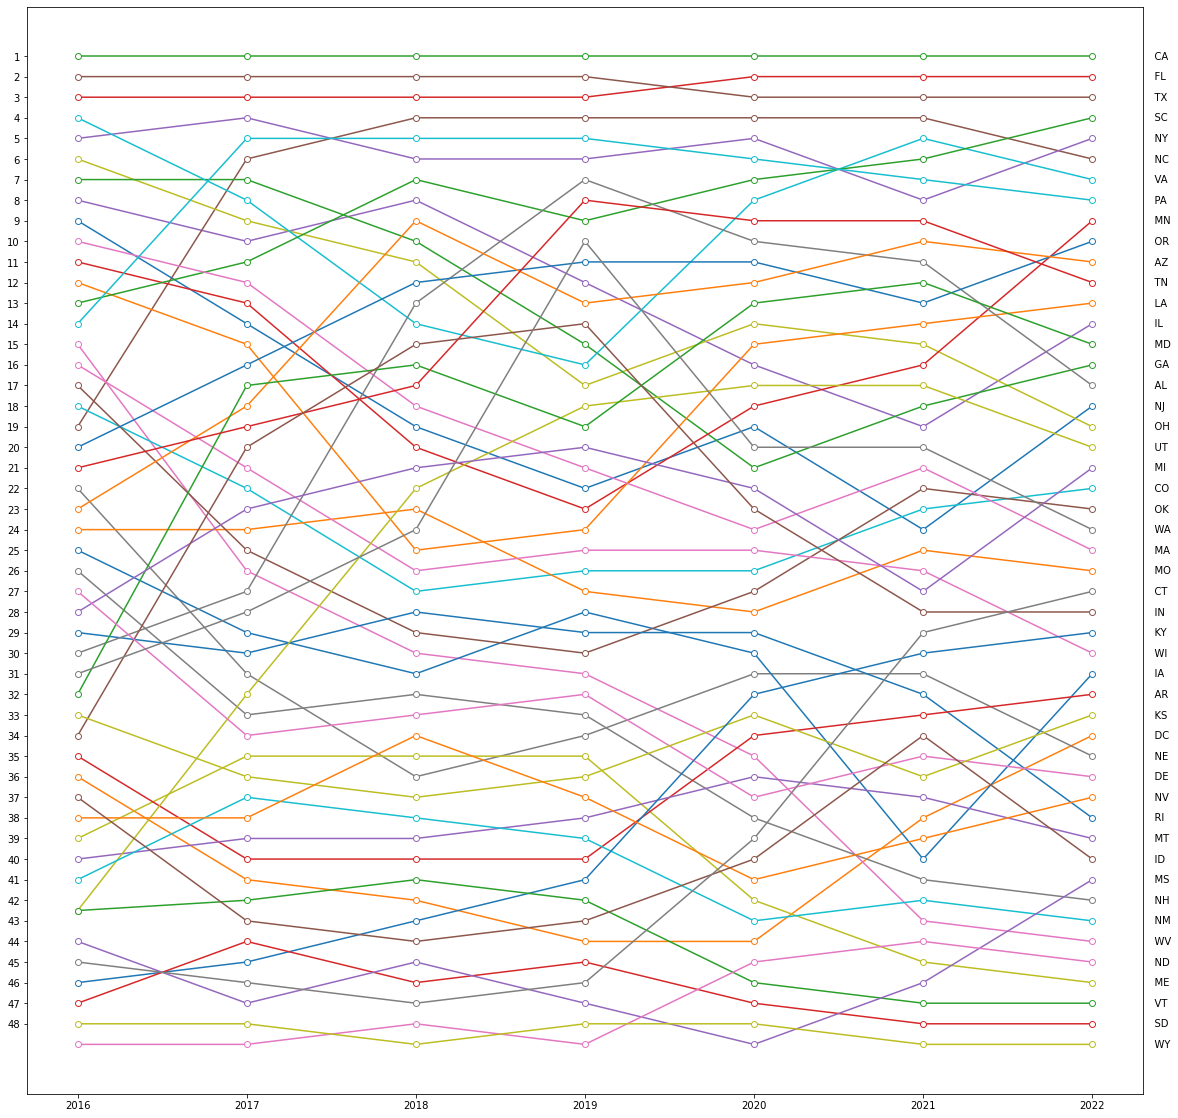

In [168]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(20)
for element in ranking_result:
    ax.plot(element["Year"], 
          element["Rank"], 
          "o-", 
          markerfacecolor="white")
    ax.annotate(' '*20+f"{element['Name'][0]}", 
                  xy=(2022, element["Rank"][4]), 
                  xytext=(2022,element["Rank"][4]), 
                  va="center")
plt.gca().invert_yaxis()
plt.yticks(range(1,len(df["State"].unique()),1))
plt.show()

<ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #900C3F">Insights</li>
</ul>

<p>I know this chart may seem overwhelming ( Although clear if you look closely), we'll focus instead on the states that have one day and or another been in the top 5 cities with the most accidents, but before that, we can already see here :</p>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>Wyoming is the state with the fewest accidents, and above all the most stable in this possible (Still towards the lows since 2016).</li>
    <li>West Virginia and New Hampshire have seen a big drop in their number of accidents, as their current rankings can attest.</li>
</ul>

<p style="color:red;">(Of course, it's possible to dig much deeper and see in more detail things like the greatest variations in ranks, or the evolution of ranks for each severity level, for example).</p>

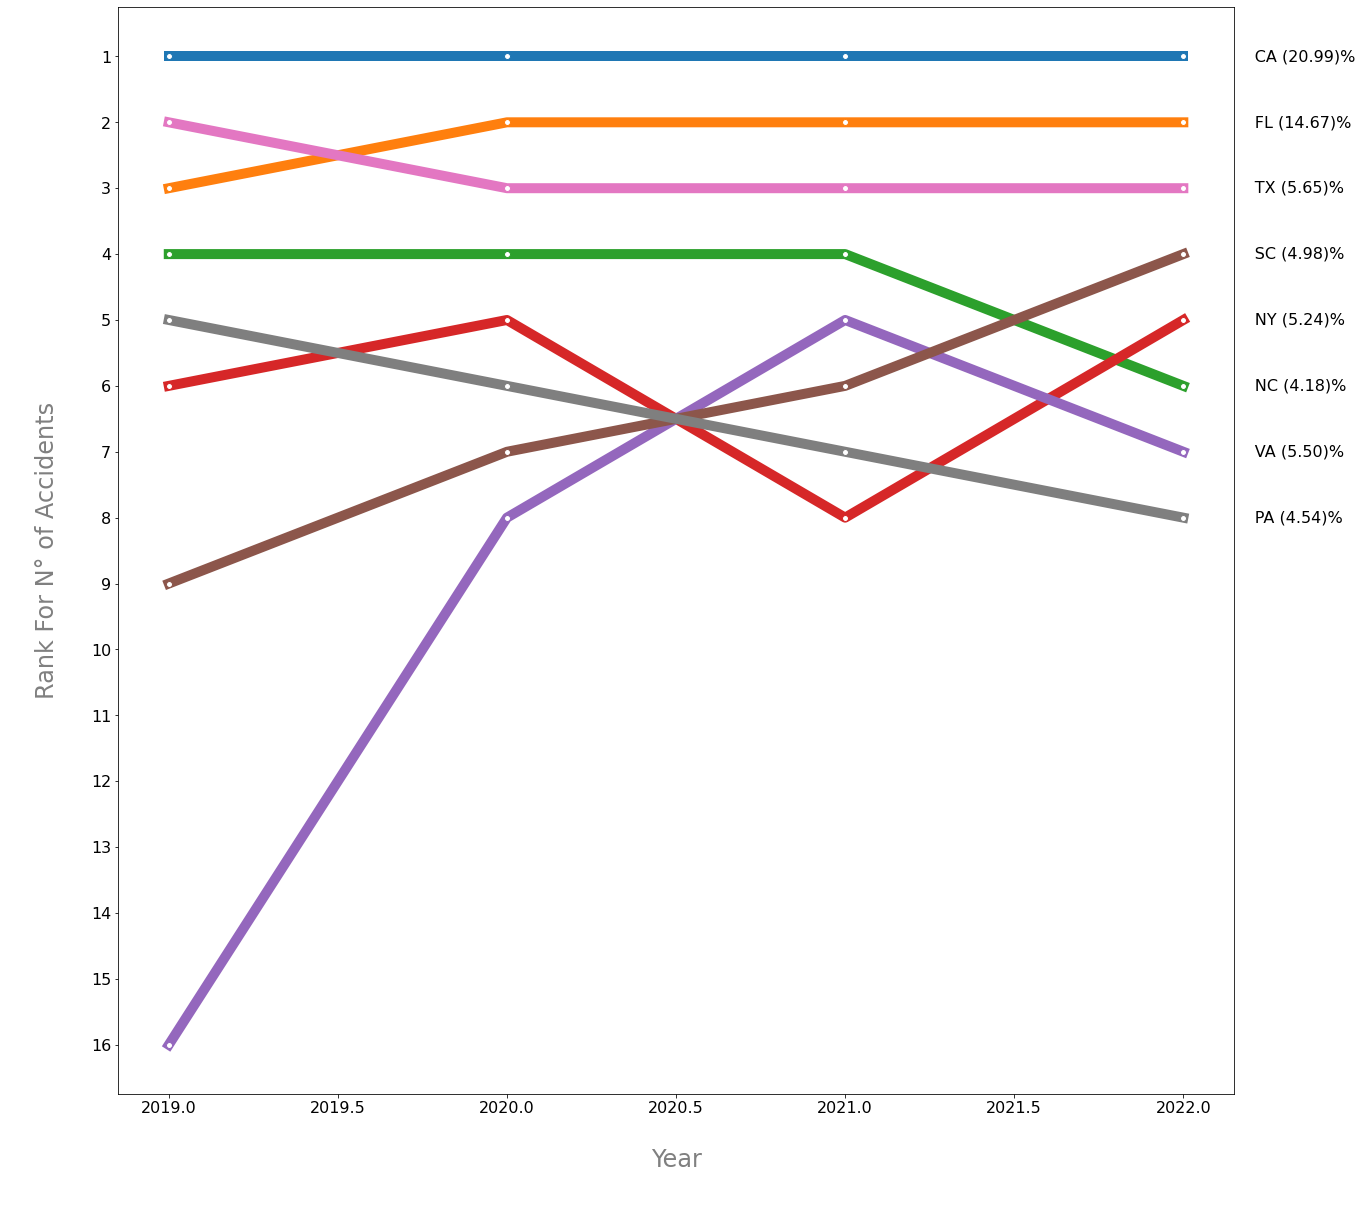

In [173]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(20)
for element in ranking_result:
    if not(any(i in element['Rank'] for i in range(1, 6))):
        continue
    ax.plot(element["Year"][3:], 
          element["Rank"][3:], 
          "o-", 
          markerfacecolor="white",
           linewidth=10)
    ax.annotate(' '*14+f"{element['Name'][0]} ({element['Proportion']:.2f})%", 
                  xy=(2022, element["Rank"][4]), 
                  xytext=(2022,element["Rank"][4]), 
                  va="center",
               fontsize=16)
plt.gca().invert_yaxis()

ax.set_ylabel('\nRank For N° of Accidents\n', fontsize=24, color='grey')
ax.set_xlabel('\nYear\n', fontsize=24, color='grey')

plt.yticks(range(1,17,1))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

<ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #900C3F">Insights</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>Since 2016, California has been the state with the most accidents.</li>
    <li>The top 3 states (California - Florida - Texas) alone account for 41.31% of all accidents.</li>
    <li>Virgie has seen an increase in the number of accidents, although this has fallen between 2021 and 2022.</li>
</ul>

---------

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:23px;font-style: italic;margin:15px;">"And what about temperature? Does it influence accidents?
 </li>
</ul>

<ul style="list-style-type:none; text-align:left;">
    <li style="font-weight: 300;font-size:15px;margin:15px;">To answer this question, we're going to take a closer look at the distribution of temperatures across the country, using geographical data with Geopandas.
 </li>
     <li style="font-weight: 300;font-size:15px;margin:15px;">As you know, our dataset contains for each dataset its longitude and lattitude coordinates, which allow us to define on a map the location of any place (even in vectors or polygons, which are a set of points). 
 </li>
    <li style="font-weight: 300;font-size:15px;margin:15px;">(Also, Let's convert temperature to degrees Celsius will be easier)
 </li>
</ul>

To answer this question, we're going to take a closer look at the distribution of temperatures across the country, using geographical data with Geopandas.

As you know, our dataset contains for each dataset its longitude and lattitude coordinates, which allow us to define on a map the location of any place (even in vectors or polygons, which are a set of points). 

(Also, Let's convert temperature to degrees Celsius will be easier)

In [5]:
states = gpd.read_file('./map/cb_2018_us_state_500k.shp')

In [9]:
geometry = [Point(xy) for xy in zip(df['Start_Lng'], df['Start_Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)


In [10]:
gdf["Temperature(C)"] = (gdf["Temperature(F)"] - 32) * (5/9)


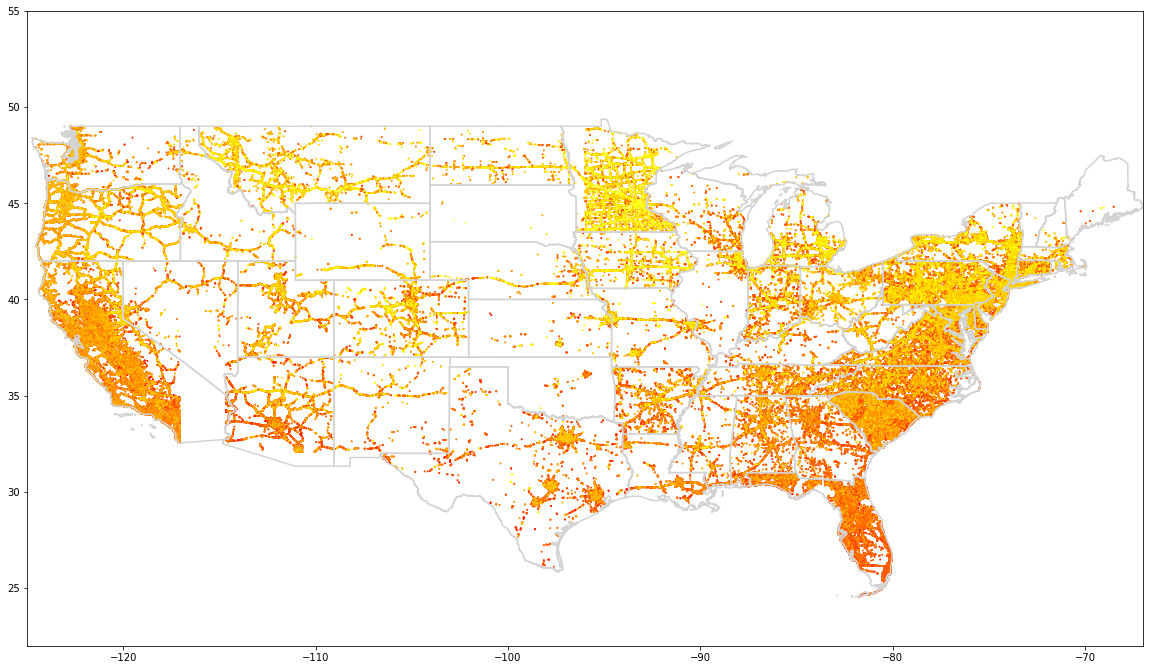

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the map of states
states.boundary.plot(ax=ax, color='lightgray')

# Plot the data points
gdf.dropna().plot(column="Temperature(C)", cmap='hot_r', markersize=1, ax=ax)

ax.set_xlim([-125,-67])
ax.set_ylim([22,55])

plt.show()

<ul style="list-style-type:none; text-align:center;">
    <li style="font-size:23px;font-style: italic;margin:15px;">Similarly, a heatmap can be created in blue, to make it easier to detect the coldest spots.
 </li>
</ul>

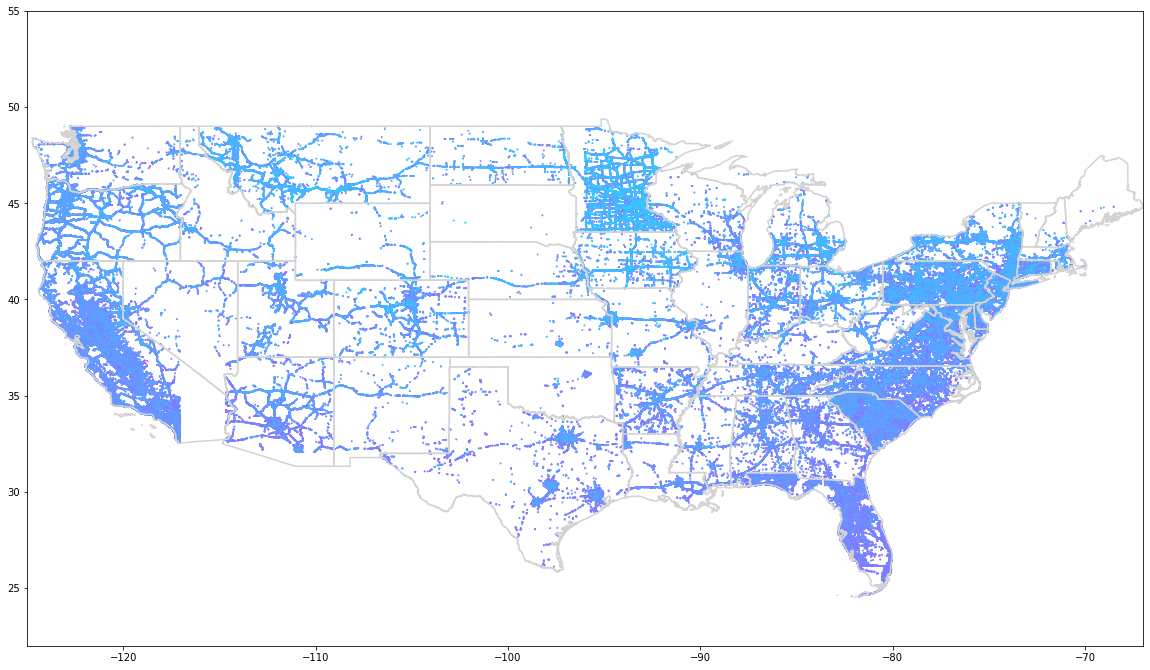

In [84]:
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the map of states
states.boundary.plot(ax=ax, color='lightgray')

# Plot the data points
gdf.dropna().plot(column="Temperature(C)", cmap='cool', markersize=1, ax=ax)

ax.set_xlim([-125,-67])
ax.set_ylim([22,55])

plt.show()


<ul style="list-style-type:none; text-align:center;">
    <li style="font-size:23px;font-style: italic;margin:15px;">We'd need a more powerful tool, however, to better understand the temperature relationship in certain areas, and that's what we'll see later!
 </li>
</ul>

--------

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:30px;color:#F94C10">Inference Statistics</li>
</ul>

<div class="alert alert-info" role="alert" style="background-color:#F8DE22">
    <p style="font-size:20px;color:black"> Now we're going to use inferential statistics to answer some slightly more complex questions! <span style="font-weight:bold;">Inferential Statistics</span>is the branch of statistics that involves drawing conclusions and making predictions about a population based on sample data.</p>
    <p style="font-size:20px;color:black">While descriptive statistics summarize and describe the characteristics of a data set, inferential statistics help us <span style="font-weight:bold;">understand</span> the larger population from which the sample is taken</p>
      <br>
    <p style="font-size:20px;color:black;font-style:italic;">In our situation, it's very useful for answering questions<span style="font-weight:bold;"> that aren't necessarily based on numbers or visualizations</span>to get the insights we're looking for.</p>
    <br>
    <img src="https://www.wallstreetmojo.com/wp-content/uploads/2022/05/Inferential-Statistics.jpg">
  </div>

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:23px;font-style: italic;margin:15px;">"Does Severity change from year to year ?
 </li>
</ul>

<p style="font-style:italic; font-size:14px;">I feel that this question requires this kind of method, because it's easy to be biased by the numbers, and one could quickly conclude that the severity varies as the number increases. That's why I've proceeded to do a random sample with equivalent sizes for 2021 and 2022 (two close and post-covid years).</p>

In [5]:
df_copy=df.copy()

In [6]:
i=0
result_dict = {}
for year in [2021,2022]:
    result_dict[year] = list(df_copy[df_copy["Year"] == year].index)

for year in [2021,2022]:
    length_df=len(df_copy)
    i+=1
    for j in range(math.floor(length_df*0.02)):
        choice=random.choice(result_dict[year])
        df_copy.loc[choice, 'Sample']='Sample'+str(i)
        result_dict[year].remove(choice)
        


<div class="alert alert-info" role="alert" style="background-color:#F8DE22">
    <p style="font-size:20px;color:black">The Chi-Square test is a statistical method used to determine if there is a <span style="font-weight:bold;">significant association between two categorical variables</span></p>
    <p style="font-size:20px;color:black"> It helps researchers understand whether the observed distribution of data differs from the expected distribution, allowing them to assess whether any relationship exists between the variables being studied.</p>
      <br>
    <p style="font-size:20px;color:black;font-style:italic;">The formula for the test is : 
    </p>
    <br>
      $$
\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$
   
    
   <p style="font-size:15px;color:black;font-style:italic;">Where.. 
    </p> 
  <ul style="list-style-type:circle;font-size:15px;color:black">
    <li>O is the observed frequency</li>
    <li>E is the expected frequency</li>
</ul>
    <p style="font-size:15px;color:black;">The expectation can be something put in by the researchers or simply the sum of all the numbers, in which case we're looking to see if there's a difference in number between two variables. (And especially by how much, with a degree of confidence).</p> 
  </div>
  


<p style="font-size:17px;color:black;">So, in our case, we'll have these two hypotheses, and our aim will be to confirm or reject hypothesis 0! This is achieved using the P-Value, which is a value given by our test, and which must be as small as possible to reject the hypothesis.
    </p>
    
<p style="font-size:15px;color:black;font-style:italic;">(In reality, it's more a comparison with a "confidence level" that we're doing. In general, we're often looking for a p-value lower than <0.1 or >>0.05, but obviously the level can be adjusted for more specific research).
    </p>
    
    
$$
H_0 : P_{2021} = P_{2022} \\
H_{alt} : P_{2021} \neq P_{2022} \\
$$

In [9]:
contingency_table = pd.crosstab(df_copy["Sample"],df_copy["Severity"])

# Calculate the total sum of the contingency table
totalsum = contingency_table.sum().sum()

# Get row sums (Sum of Samples)
row_sums = contingency_table.sum(axis=1)

# Get column sums (Sum of Severities)
col_sums = contingency_table.sum(axis=0)

# Generate expected values matrix
expected_values = np.outer(row_sums, col_sums) / totalsum

# Get observed values directly from the contingency table
observed_values = contingency_table.values 

# Calculate the chi-square statistic
chi_squared_stat = ((observed_values-expected_values)**2/expected_values).sum().sum()

# Calculate the degrees of freedom
df_ = (len(row_sums)-1)*(len(col_sums)-1) 

# Get p-value from chi-square distribution
p_value = 1 - chi2.cdf(chi_squared_stat, df_)

print("Chi-squared Statistic :", chi_squared_stat)
print("Degrees of Freedom :", df_)
print("P-Value :", p_value)

Chi-squared Statistic : 2245.552126440665

Degrees of Freedom : 3

P-Value : 0.0


<p style="font-size:17px;color:black;">Our P-Value is 0, so..
    </p>
    
 <ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #900C3F">Insights</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>We can reject hypothesis 0 and say that there is a real shift in the level of severity between 2021 and 2022.</li>
</ul>

-------------

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:23px;font-style: italic;margin:15px;">"What's the real impact of Timezones ? (Or is it just a question of number and population?)"
 </li>
</ul>
    
 <p style="font-size:17px;color:black;">Again here, we'll try to see if we can reject or not the Hypothesis 0
    </p>
    
    
 $$
H_0 : P_{Central} = P_{Pacific} = P_{Eastern} = P_{Mountain} \\
H_{alt} : P_{Central} \neq P_{Pacific} \neq P_{Eastern} \neq P_{Mountain} \\
$$

In [64]:
df_copy=df.copy()

In [65]:
i=0
result_dict = {}
for Timezone in ['US/Central', 'US/Pacific', 'US/Eastern', 'US/Mountain']:
    result_dict[Timezone] = list(df_copy[df_copy["Timezone"] == Timezone].index)

for Timezone in ['US/Central', 'US/Pacific', 'US/Eastern', 'US/Mountain']:
    length_df=len(df_copy)
    i+=1
    for j in range(math.floor(length_df*0.001)):
        choice=random.choice(result_dict[Timezone])
        df_copy.loc[choice, 'Sample']='Sample'+str(i)
        result_dict[Timezone].remove(choice)
        


In [67]:
pd.crosstab(df_copy["Sample"],df_copy["Severity"])

Severity,1,2,3,4
Sample,,,,
Sample1,57,2226,360,38
Sample2,22,2458,183,18
Sample3,51,2337,210,83
Sample4,27,2393,191,70


In [68]:
chi2_contingency(pd.crosstab(df_copy["Sample"],df_copy["Severity"]))

(174.23905701784332,
 8.069102670370948e-33,
 9,
 array([[  39.25, 2353.5 ,  236.  ,   52.25],
        [  39.25, 2353.5 ,  236.  ,   52.25],
        [  39.25, 2353.5 ,  236.  ,   52.25],
        [  39.25, 2353.5 ,  236.  ,   52.25]]))

 <ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #900C3F">Insights</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>We cannot reject the Hypothesis 0 (P-value = 8,06), and so it doesn't seem to be a relationship between Timezones & Severity Level</li>
</ul>

 <p style="font-size:17px;color:black;"> <span style="text-style:italic;">"But the numbers seem close for specific samples, should we try to compare them?"</span> Even after several tests, the p-value is still high...
    </p>

In [127]:
chi2_contingency(pd.crosstab(df_copy["Sample"],df_copy["Severity"]).iloc[0:2,])

(116.12123934216984,
 5.2805846402138485e-25,
 3,
 array([[  40.5, 2354. ,  255.5,   31. ],
        [  40.5, 2354. ,  255.5,   31. ]]))

In [129]:
chi2_contingency(pd.crosstab(df_copy["Sample"],df_copy["Severity"]).iloc[[2,3],])

(2.323478670463251,
 0.5080379450688082,
 3,
 array([[  42.5, 2347. ,  211.5,   80. ],
        [  42.5, 2347. ,  211.5,   80. ]]))

------------

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:23px;font-style: italic;margin:15px;">"What are the most frequent hours for accidents ?"
 </li>
</ul>

<div class="alert alert-info" role="alert" style="background-color:#F8DE22">
    <p style="font-size:20px;color:black">A confidence interval is a <span style="font-weight:bold;">range of values</span>that we can be reasonably confident contains the true value of a population parameter, such as the mean or proportion.</p>
    <p style="font-size:20px;color:black"> It is calculated based on a sample from the population and provides an estimate of the parameter's value along with a measure of uncertainty.</p>
      <br>
    <p style="font-size:20px;color:black"><span style="font-weight:bold;">The wider the confidence interval, the less precise our estimate,</span>while a narrower interval indicates a more precise estimate. In simple terms, a confidence interval helps us understand the range of values within which the true population parameter is likely to fall.</p>
    <br>
      $$
\text{{Point Estimate}} \pm \text{{Reliability Factor}} \times \text{{Standard Error}}
$$
   
    
   <p style="font-size:15px;color:black;font-style:italic;">Where.. 
    </p> 
  <ul style="list-style-type:circle;font-size:15px;color:black">
    <li>Where the Point Estimate $\bar{x}$ is generally the mean sample.</li>
    <li>Where the Standard Error $SE$ is a measure of the variability or dispersion of the sample mean. It is calculated using the formula $\frac{{\text{{Standard Deviation}}}}{{\sqrt{{\text{{Sample Size}}}}}}$ and represents the average amount of error we expect in our estimate of the population mean.</li>
      <li>Where it's a statistic deduced from the distribution of the data (e.g., Normal distribution symbol $\mathcal{N}$, Student's t-distribution symbol $\mathcal{t}$, etc.).</li>
</ul>
    
  <img src="https://nulib.github.io/moderndive_book/ismaykimkuyper_files/figure-html/N-CIs-1.png">
  </div>
  



In [5]:
df_copy=df.copy()

<AxesSubplot: xlabel='Hour', ylabel='count'>

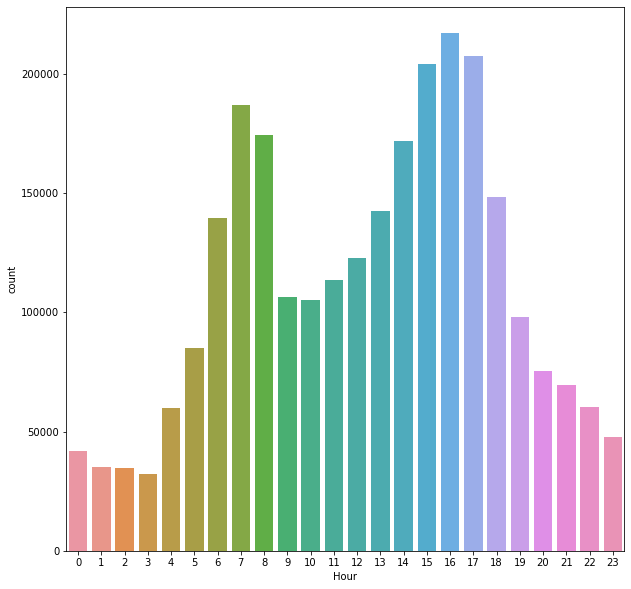

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_copy,x="Hour")

 <p style="font-size:17px;color:black;">To get an overview of the hours with as little bias as possible, we will try to take the months without big events in 2021/2022 (Black Friday, Christmas, Sport, etc.).
    </p>

In [7]:
desired_dates = ['2021-03', '2021-04', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2022-01', '2022-02', '2022-03', '2022-04']

df_copy['Year_Month'] = df_copy['Year'].astype(str) + '-' + df_copy['Month'].astype(str).str.zfill(2)

filtered_df = df_copy[df_copy['Year_Month'].isin(desired_dates)]

filtered_df = filtered_df.drop(columns=['Year_Month'])


<AxesSubplot: xlabel='Hour', ylabel='Count'>

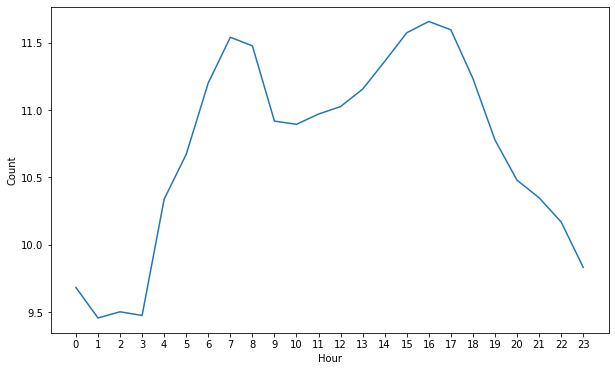

In [8]:
hour_counts = filtered_df["Hour"].value_counts().reset_index()
hour_counts.columns = ["Hour", "Count"]
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.xticks(filtered_df["Hour"].unique())

sns.lineplot(data=hour_counts, x="Hour", y=hour_counts["Count"].apply(lambda x:math.log(x)))

<div class="alert alert-info" role="alert" style="background-color:#F8DE22">
    <p style="font-size:20px;color:black"> A bimodal distribution is a type of probability distribution that has two distinct peaks or modes. In other words, it is a distribution where there are two prominent values or groups of values that occur with relatively high frequency. This is in contrast to a unimodal distribution, which has only one peak.</p>
    <img src="https://study.com/cimages/videopreview/videopreview-full/screen_shot_2016-01-05_at_7.06.21_am_115344.jpg">
  </div>
  


   <p style="font-size:15px;color:black;">We will "divide" the data into two sections to get a single peak (We need it like that): 
</p> 
  <ul style="list-style-type:circle;font-size:15px;color:black">
    <li>Daytime hours</li>
    <li>Night hours</li>
</ul>

----

<ul style="list-style-type:none; text-align:left;">
    <li style="font-weight: bold;font-size:16px;margin:15px;">Hours counts day
 </li>
</ul>

In [9]:
hour_counts_day=hour_counts[(hour_counts["Hour"] >= 3) & (hour_counts["Hour"] <= 10)]
hour_counts_day

,Hour,Count
3,7,102696
4,8,96370
7,6,73167
11,9,55129
12,10,53826
14,5,43080
17,4,30884
22,3,13031


<AxesSubplot: xlabel='Hour', ylabel='Count'>

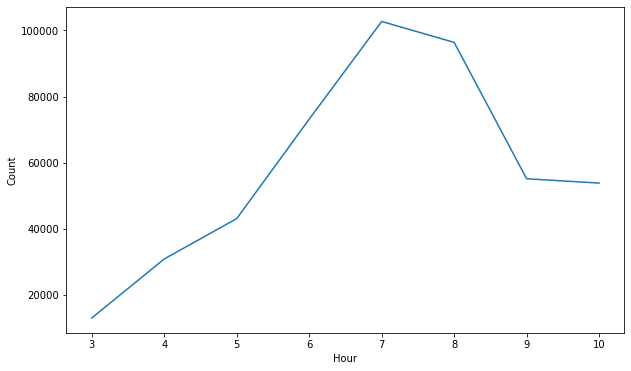

In [10]:

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.xticks(hour_counts_day["Hour"].unique())

sns.lineplot(data=hour_counts_day, x="Hour", y=hour_counts_day["Count"])

<div class="alert alert-info" role="alert" style="background-color:#F8DE22">
    <p style="font-size:20px;color:black">The t-distribution, also known as Student's t-distribution, is a probability distribution that is used in statistical inference <span style="font-weight:bold;"> when the sample size is small.</span></p>
    <p style="font-size:20px;color:black">It is similar to the normal distribution but has thicker tails, which means it accounts for more variability in the data.</p>
      <br>
    <p style="font-size:20px;color:black">The formula is : $[ t = \frac{{\bar{x} - \mu}}{{\frac{{s}}{{\sqrt{n}}}}} ]$</p>
    <br>
   
    
   <p style="font-size:15px;color:black;font-style:italic;">Where.. 
    </p> 
  <ul style="list-style-type:circle;font-size:15px;color:black">
    <li>$(t)$ represents the t-value or t-statistic.</li>
    <li>$(\bar{x})$ is the sample mean.</li>
      <li>$(\mu)$ is the population mean (the parameter we are estimating).</li>
      <li>$(s)$ is the sample standard deviation.</li>
      <li>$(n)$ is the sample size.</li>
</ul>
    
    
 <img src="https://dmn92m25mtw4z.cloudfront.net/img_set/stat-6-6-x-3-article/v1/stat-6-6-x-3-article-1481w.png">
    
  </div>
  



In [15]:

# Calculate the confidence interval
confidence = 0.95  # Set the desired confidence level
sample_mean = hour_counts_day['Count'].mean()  # Calculate the sample mean
sample_size = hour_counts_day.shape[0]  # Calculate the sample size
standard_error = stats.sem(hour_counts_day['Count'])  # Calculate the standard error

# Calculate the confidence interval using t-distribution
ci = stats.t.interval(confidence, df=sample_size-1, loc=sample_mean, scale=standard_error)

# Print the confidence interval
print("Confidence Interval:")
print(f"Lower Bound: {ci[0]}")
print(f"Upper Bound: {ci[1]}")
result_interval = hour_counts_day[(hour_counts_day["Count"] >= ci[0]) & (hour_counts_day["Count"] <= ci[1])]
print(f"We are 95% sure that accidents falls in [{result_interval['Hour'].min()},{result_interval['Hour'].max()}]")

Confidence Interval:

Lower Bound: 32651.341962705403

Upper Bound: 84394.4080372946

We are 95% sure that accidents falls in [5,10]


----

<ul style="list-style-type:none; text-align:left;">
    <li style="font-weight: bold;font-size:16px;margin:15px;">Hours counts night
 </li>
</ul>

In [16]:
hour_counts_night=hour_counts[(hour_counts["Hour"] < 0) | (hour_counts["Hour"] > 10)]
hour_counts_night

,Hour,Count
0,16,115459
1,17,108503
2,15,106194
5,14,85844
6,18,75569
...,...,...
13,19,47906
15,20,35543
16,21,31210
18,22,26082


<AxesSubplot: xlabel='Hour', ylabel='Count'>

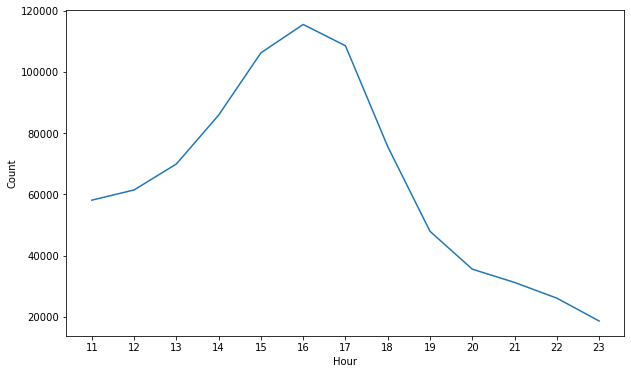

In [17]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.xticks(hour_counts_night["Hour"].unique())

sns.lineplot(data=hour_counts_night, x="Hour", y=hour_counts_night["Count"])

In [19]:

confidence = 0.95  
sample_mean = hour_counts_night['Count'].mean()  
sample_size = hour_counts_night.shape[0]  
standard_error = stats.sem(hour_counts_night['Count'])  

ci = stats.t.interval(confidence, df=sample_size-1, loc=sample_mean, scale=standard_error)

print("Confidence Interval:")
print(f"Lower Bound: {ci[0]}")
print(f"Upper Bound: {ci[1]}")
result_interval = hour_counts_night[(hour_counts_night["Count"] >= ci[0]) & (hour_counts_night["Count"] <= ci[1])]
print(f"We are 95% sure that accidents falls in [{result_interval['Hour'].min()},{result_interval['Hour'].max()}]")

Confidence Interval:

Lower Bound: 44956.52213083995

Upper Bound: 84323.78556146774

We are 95% sure that accidents falls in [11,19]


------

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:23px;font-style: italic;margin:15px;">"How is the influence of Temperature on accidents ?"
 </li>
</ul>

 

<div class="alert alert-info" role="alert" style="background-color:#F8DE22">
    <p style="font-size:20px;color:black">Regression analysis is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It aims to <span style="font-weight:bold;">understand how changes in the independent variables are associated with changes in the dependent variable.</span></p>
    <br>
    <p style="font-size:20px;color:black">In regression analysis, the dependent variable is the variable <span style="font-weight:bold;">we want to predict</span> or explain, while the independent variables are the variables that we believe <span style="font-weight:bold;">may have an impact</span> on the dependent variable.</p>
      <br>
  
    
  <img src="https://www.imsl.com/sites/default/files/styles/social_preview_image/public/image/2021-06/IMSL%20What%20is%20Regression%20Model%20Blog%20Feature.png?itok=y6F7nJ19">
  </div>
  



In [21]:
df_copy=df.copy()

   <p style="font-size:15px;color:black;">Again, let's convert to Celcius ;)
</p> 

In [22]:
df_copy["Temperature(C)"] = (df_copy["Temperature(F)"] - 32) * (5/9)


   <p style="font-size:15px;color:black;">In regression analysis, we're primarily interested in building up a general picture of our data and its relationships, which is why it's important to get rid of outliers and extreme values.
</p> 

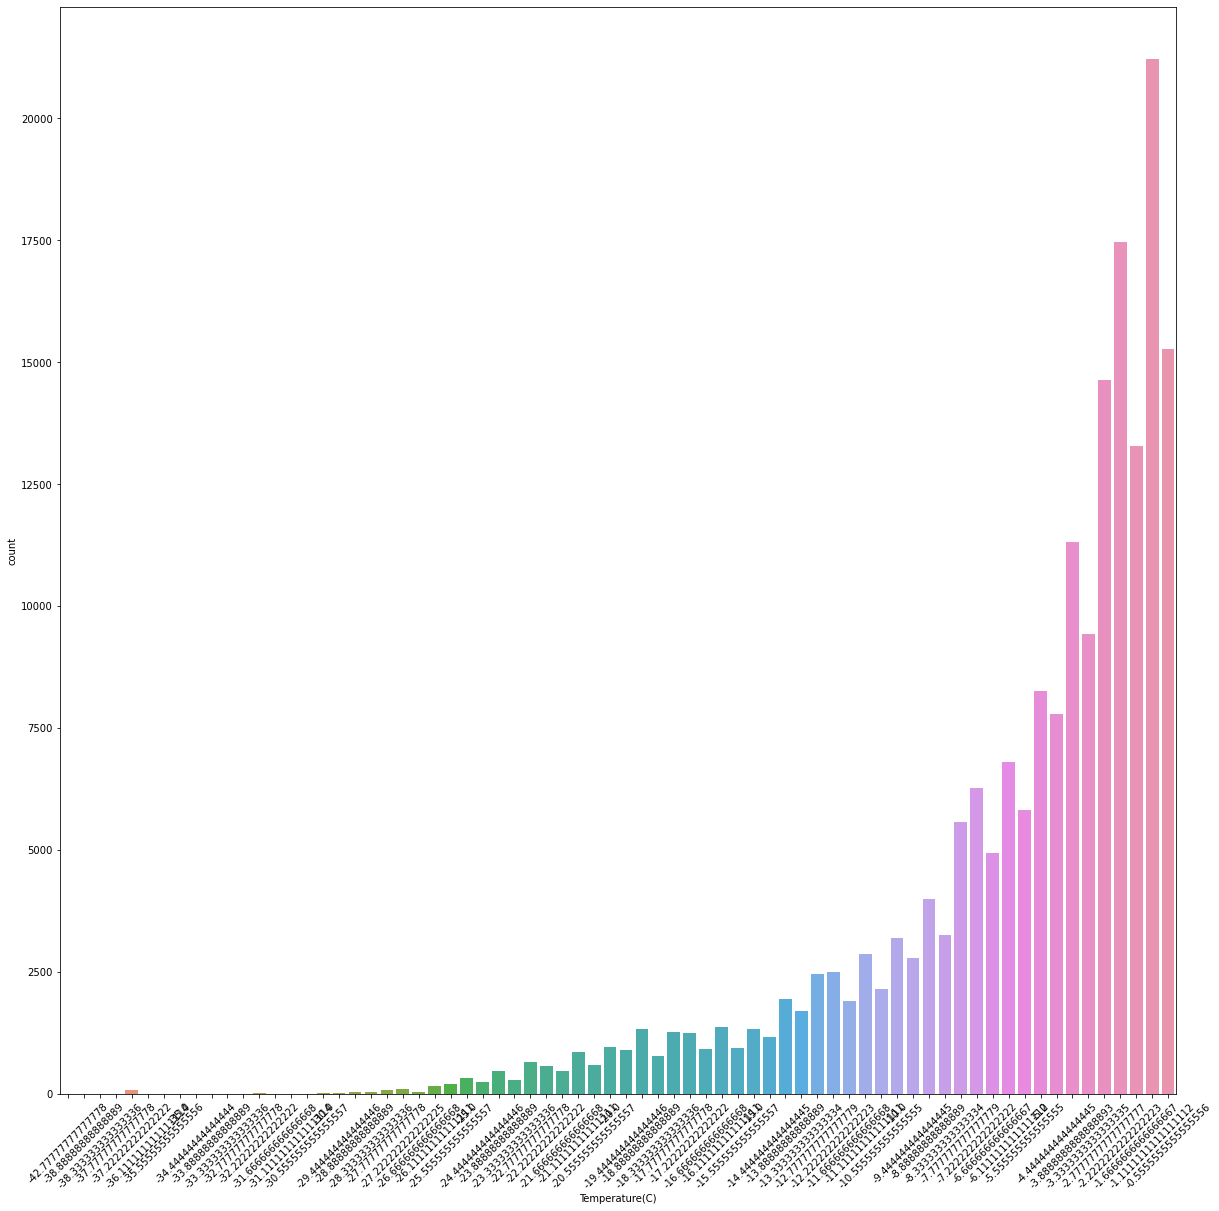

In [23]:
plt.figure(figsize=(20,20))
sns.countplot(df_copy[df_copy["Temperature(C)"]<0],x="Temperature(C)")
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

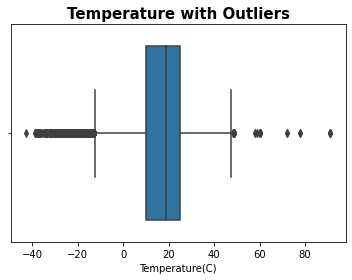

In [28]:
sns.boxplot(df_copy,x="Temperature(C)")
plt.title("Temperature with Outliers",fontsize=15,fontweight="bold")
plt.show()

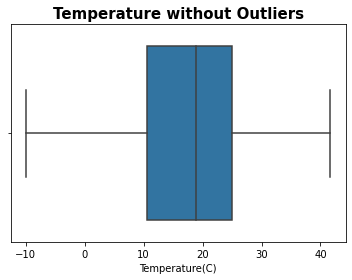

In [29]:
sns.boxplot(df_copy[(df_copy["Temperature(C)"]<=42) & (df_copy["Temperature(C)"]>=-10)],x="Temperature(C)")
plt.title("Temperature without Outliers",fontsize=15,fontweight="bold")
plt.show()

In [31]:
df_copy=df_copy[(df_copy["Temperature(C)"]<=42) & (df_copy["Temperature(C)"]>=-10)]

In [42]:
temp_counts = df_copy["Temperature(C)"].value_counts().reset_index()
temp_counts.columns = ["Temperature(C)", "Count"]
temp_counts

,Temperature(C),Count
0,22.777778,69939
1,22.222222,65824
2,25.000000,64833
3,23.888889,64541
4,21.111111,61741
...,...,...
89,40.000000,1152
90,39.444444,1115
91,41.111111,743
92,40.555556,584


<AxesSubplot: xlabel='Temperature(C)', ylabel='Count'>

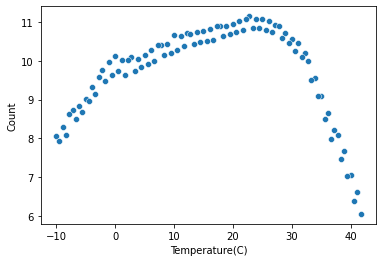

In [43]:
sns.scatterplot(temp_counts,x="Temperature(C)",y=temp_counts["Count"].apply(lambda x:math.log(x)))

   <p style="font-size:15px;color:black;">When we plot the Temperature-Nb Accidents relationship, we notice that it does not adopt a linear curve, but rather a curved one, which is why we will study the relationship with polynomial regression.
</p> 

<div class="alert alert-info" role="alert" style="background-color:#F8DE22">
    <p style="font-size:18px;color:black">Polynomial regression is a type of regression analysis that allows for a non-linear relationship between the independent and dependent variables. It extends the concept of linear regression by including higher-order terms of the independent variable(s) in the regression equation.</p>
  <p style="font-size:18px;color:black">In polynomial regression, the regression equation takes the form:
$[ y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \ldots + \beta_nx^n + \epsilon ]$</p>
    
  </div>
  



In [44]:
X = temp_counts['Temperature(C)'].values.reshape(-1, 1)
y = temp_counts['Count'].values


# Degree of the polynomial regression
degree = 3  # You can change this to the degree you want (e.g., 3 for cubic regression)

# Transforming the features to include polynomial terms
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fitting the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Getting the coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_


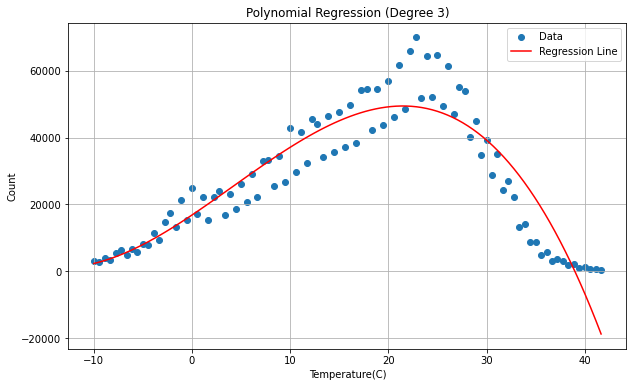

In [45]:
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = model.predict(X_line_poly)

# Plotting the data points and the line of regression
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_line, y_line, color='red', label='Regression Line')
plt.xlabel('Temperature(C)')
plt.ylabel('Count')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
X_poly_with_constant = sm.add_constant(X_poly)
model_stats = sm.OLS(y, X_poly_with_constant).fit()
print(model_stats.summary())

                            OLS Regression Results                            


Dep. Variable:                      y   R-squared:                       0.843

Model:                            OLS   Adj. R-squared:                  0.838

Method:                 Least Squares   F-statistic:                     160.9

Date:                Thu, 10 Aug 2023   Prob (F-statistic):           4.81e-36

Time:                        14:39:09   Log-Likelihood:                -974.85

No. Observations:                  94   AIC:                             1958.

Df Residuals:                      90   BIC:                             1968.

Df Model:                           3                                         

Covariance Type:            nonrobust                                         


                 coef    std err          t      P>|t|      [0.025      0.975]

------------------------------------------------------------------------------

const       1.684e+04   1406.251     1

   <p style="font-size:16.5px;color:black;">When evaluating a regression analysis, it is important to take several parameters into account, such as : 
</p> 

   <p style="font-size:15px;color:black;"><span style="font-weight:bold;">R²:</span> Between 1 and 0, which defines the justification of your prediction in relation to the whole dataset. In our case, R² is 0.843, which means that 84.3% of the variance is justified by temperature.
</p> 

   <p style="font-size:15px;color:black;"><span style="font-weight:bold;">P-Value of each coefficient:</span> Each coefficient adopts a p-value that shows its importance in the prediction.
</p> 

   <p style="font-size:16.5px;color:black;">Be careful, of course, because correlation does not mean causation!
</p> 

   <p style="font-size:16.5px;color:black;">Nevertheless, it's worth noting that :
</p> 

<ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #900C3F">Insights</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>There is a 1969 increase in the number of accidents approximately as the temperature rises.</li>
    <li>The P-Value of x³ indicates its importance and that, indeed, there is a descent at a certain point in our dataset of -2.36 * (Temperature)³.</li>
</ul>

--------

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:23px;font-style: italic;margin:15px;">"What about after the accident ? What could we say about it ? " 
 </li>
</ul>

 




<div class="alert alert-info" role="alert" style="background-color:#F8DE22">
    <p style="font-size:18px;color:black"> Bootstrapping is a resampling method that allows us to make inferences about a population based on a single sample. It is particularly useful when the underlying population distribution is unknown or when traditional statistical assumptions are violated. It provides a robust and flexible approach to estimate uncertainty and make inferences about a population based on limited data.</p>
    
    
 <img src="https://blogs.sas.com/content/iml/files/2018/12/bootstrapSummary.png">
  </div>
  



In [55]:
df_copy=df.copy()

In [56]:
df_copy["Duration"]=df_copy["End_Time"] - df_copy["Start_Time"]
df_copy["Duration"]=df_copy["Duration"].apply(lambda x: x.total_seconds() / 60)
df_copy["Duration"]

0           45.383333
1          149.450000
2          144.083333
3           29.750000
4           29.633333
              ...    
2681234    129.150000
2681235    100.983333
2681236    120.000000
2681237    229.816667
2681238    180.016667
Name: Duration, Length: 2681239, dtype: float64

In [57]:
df_copy=df_copy.loc[df_copy["Duration"] <= 400]

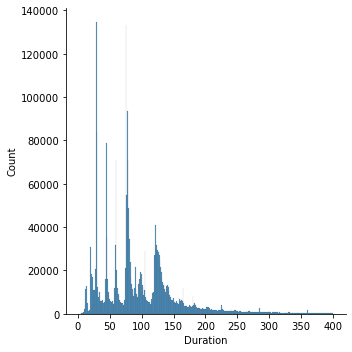

In [58]:
sns.displot(df_copy["Duration"])


<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: italic;font-size:17.5px">As you can see, the duration distribution seems pretty chaotic, so instead of data cleaning, we can try a new method: bootstrapping! </li>
</ul>



In [59]:
from sklearn.utils import resample

data = df_copy["Duration"].dropna()

# Perform bootstrap resampling
n_iterations = 5000
bootstrap_means = []
for _ in range(n_iterations):
    resampled_data = resample(data)
    mean = np.mean(resampled_data)
    bootstrap_means.append(mean)

# Calculate the confidence interval using percentiles
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"The confidence interval using bootstrap resampling is: {confidence_interval}")

The confidence interval using bootstrap resampling is: [97.27757521 97.43112841]


In [60]:
df_copy["Duration"].describe()

count    2.571121e+06
mean     9.735454e+01
std      6.377734e+01
min      2.000000e+00
25%      5.081667e+01
50%      8.006667e+01
75%      1.266833e+02
max      4.000000e+02
Name: Duration, dtype: float64

C:\Users\xfour\AppData\Local\Temp\ipykernel_1620\92410026.py:1: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a figure-level function with

similar flexibility) or `histplot` (an axes-level function for histograms).



For a guide to updating your code to use the new functions, please see

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



  sns.distplot(bootstrap_means)


<AxesSubplot: ylabel='Density'>

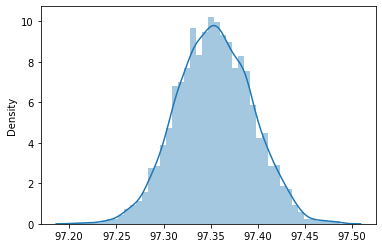

In [61]:
sns.distplot(bootstrap_means)



<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: italic;font-size:17.5px">In addition to following a normal distribution, our result has the same mean as our original dataset, 
</li>
</ul>

<ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #900C3F">Insights</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>The average duration is between 97.27 minutes and 97.43 minutes.</li>
</ul>

------

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: bold;font-size:30px;color:#F94C10">Dashboard</li>
</ul>

In [1]:
%%html
<iframe title="US Accidents - Accidents Locations Dashboard" width="1140" height="541.25" src="https://app.powerbi.com/reportEmbed?reportId=f7262d0d-05b6-4938-978b-95748f173719&autoAuth=true&ctid=dbd6664d-4eb9-46eb-99d8-5c43ba153c61" frameborder="0" allowFullScreen="true"></iframe>

<ul style="list-style-type:none; text-align:center;">
    <li style="font-weight: italic;font-size:17.5px">Remember what I said about geographic data? Now we can easily see the concentrations of accidents on different states and over specific periods of time!
</li>
</ul>

<ul style="list-style-type:none;">
    <li style="font-weight: bold;font-size:25px;color:  #F94C10;text-align:center;">Thanks to..</li>
</ul>

<ul style="list-style-type:circle;font-size:15px;color:black">
    <li>Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath for the dataset</li>
    <li><a href="https://www.kaggle.com/satyabrataroy">Satyabrata Roy</a> for the Visualization & Notebook Design Ideas</li>
</ul>